In [43]:
import os
import requests
import unicodedata
import re
from collections import Counter
import csv
from json.decoder import JSONDecodeError
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "/home/nacho/Documents/CESP/SPADE_mutiagents/scripts/webscrapping_nlp_sentencias"
os.chdir(path)

In [4]:
page_number = 1
url = "https://publica-sentencias-backend.stjjalisco.gob.mx/tocas?page=" + str(page_number) + "&sala_id=&numero=&periodo=&derivado=&delito_id=&materia_id=&nombre_delito=&accion_especifica_id=&accion_simultanea_id="
page = requests.get(url)

In [5]:
delitos_list = []
last_page = page.json()['data']['tocas']['last_page']
for page_number in range(1, last_page + 1):
    page = requests.get("https://publica-sentencias-backend.stjjalisco.gob.mx/tocas?page=" + str(page_number))
    if page.status_code == 429:
        time.sleep(int(page.headers['retry-after']))
    else:
        for toca in page.json()['data']['tocas']['data']:
            try:
                if toca["delito_data"]["nombre"] != None:
                    if toca["materia_data"]["nombre"] == None:
                        toca_file_filename = toca["delito_data"]["nombre"]
                    elif toca["accion_especifica_data"] == None and toca["accion_simultanea_data"] == None:
                        toca_file_filename = toca["materia_data"]["nombre"] + str("_") + toca["delito_data"]["nombre"]
                    elif toca["accion_especifica_data"] != None and toca["accion_simultanea_data"] != None:
                        toca_file_filename = toca["materia_data"]["nombre"] + str("_") + toca["delito_data"]["nombre"] + str("_") + toca["accion_especifica_data"]['nombre'] + str("_") + toca["accion_simultanea_data"]['nombre']
                    elif toca["accion_especifica_data"] != None and toca["accion_simultanea_data"] == None:
                        toca_file_filename = toca["materia_data"]["nombre"] + str("_") + toca["delito_data"]["nombre"] + str("_") + toca["accion_especifica_data"]['nombre']
                    elif toca["accion_especifica_data"] == None and toca["accion_simultanea_data"] != None:
                        toca_file_filename = toca["materia_data"]["nombre"] + str("_") + toca["delito_data"]["nombre"] + str("_") + toca["accion_simultanea_data"]['nombre']
                else:
                    pass
            except TypeError:
                pass   
            delitos_list.append(toca_file_filename.replace('"',''))

In [6]:
delitos_dict = dict(Counter(delitos_list))

In [7]:
delitos_file = open("delitos_stjjalisco_dict.csv", "w")
writer = csv.writer(delitos_file)
for key, value in delitos_dict.items():
    writer.writerow([key, value])
delitos_file.close()
print("proceso terminado")

proceso terminado


/home/nacho/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


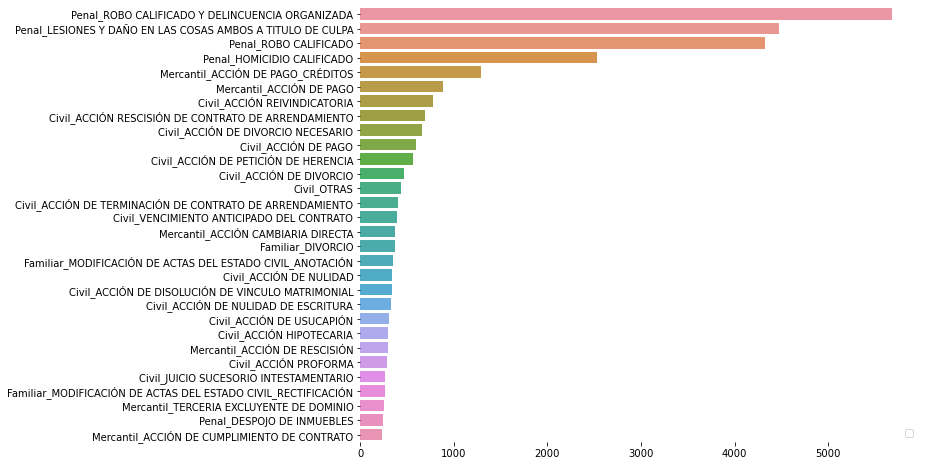

In [66]:
import operator
d = dict(sorted(delitos_dict.items(),key=operator.itemgetter(1),reverse=True))
d = {A:N for (A,N) in [x for x in d.items()][:30]}
f, ax = plt.subplots(figsize = (10,8))
sns.set_color_codes('pastel')
# sns.barplot(list(d.keys()), list(d.values()))
sns.barplot(list(d.values()), list(d.keys()))
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)

In [64]:
delitos_dict

{'Penal_ABUSO  SEXUAL INFANTIL AGRAVADO': 102,
 'Civil_OTRAS': 436,
 'Penal_DAÑO EN LAS COSAS A TITULO DE CULPA': 72,
 'Penal_ABIGEATO': 7,
 'Civil_ACCIÓN DE DISOLUCIÓN DE VINCULO MATRIMONIAL': 337,
 'Familiar_ALIMENTOS_CÓNYUGES': 2,
 'Civil_ACCIÓN DE PAGO DE PENSIÓN ALIMENTICIA': 227,
 'Penal_FALSIFICACION DE DOCUMENTOS EXPEDIDOS POR LOS PODERES DEL ESTADO, ORGANISMOS AUTONOMOS EN SU MODALID': 4,
 'Penal_HOMICIDIO CALIFICADO': 2531,
 'Penal_DESPOJO': 50,
 'Penal_ROBO CALIFICADO': 4322,
 'Penal_VIOLENCIA INTRAFAMILIAR Y MALTRATO AL INFANTE': 4,
 'Penal_DESAPARICIÓN FORZADA DE PERSONAS': 17,
 'Civil_ACCIÓN DE PAGO': 595,
 'Penal_VIOLENCIA INTRAFAMILIAR': 72,
 'Civil_ACCIÓN DE DIVORCIO': 468,
 'Penal_HOMICIDIO EN RIÑA': 23,
 'Penal_FRAUDE ESPECIFICO': 201,
 'Penal_LESIONES DOLOSAS Y AMENAZAS': 2,
 'Civil_ACCIÓN DE TERMINACIÓN DE CONTRATO DE ARRENDAMIENTO': 403,
 'Familiar_SUCESORIO_INTESTAMENTARIO_OTRAS': 13,
 'Civil_PLENARIA DE POSESION': 79,
 'Civil_ACCIÓN REIVINDICATORIA': 778,
 'Civi

In [63]:
list(delitos_dict.keys())

['Penal_ABUSO  SEXUAL INFANTIL AGRAVADO',
 'Civil_OTRAS',
 'Penal_DAÑO EN LAS COSAS A TITULO DE CULPA',
 'Penal_ABIGEATO',
 'Civil_ACCIÓN DE DISOLUCIÓN DE VINCULO MATRIMONIAL',
 'Familiar_ALIMENTOS_CÓNYUGES',
 'Civil_ACCIÓN DE PAGO DE PENSIÓN ALIMENTICIA',
 'Penal_FALSIFICACION DE DOCUMENTOS EXPEDIDOS POR LOS PODERES DEL ESTADO, ORGANISMOS AUTONOMOS EN SU MODALID',
 'Penal_HOMICIDIO CALIFICADO',
 'Penal_DESPOJO',
 'Penal_ROBO CALIFICADO',
 'Penal_VIOLENCIA INTRAFAMILIAR Y MALTRATO AL INFANTE',
 'Penal_DESAPARICIÓN FORZADA DE PERSONAS',
 'Civil_ACCIÓN DE PAGO',
 'Penal_VIOLENCIA INTRAFAMILIAR',
 'Civil_ACCIÓN DE DIVORCIO',
 'Penal_HOMICIDIO EN RIÑA',
 'Penal_FRAUDE ESPECIFICO',
 'Penal_LESIONES DOLOSAS Y AMENAZAS',
 'Civil_ACCIÓN DE TERMINACIÓN DE CONTRATO DE ARRENDAMIENTO',
 'Familiar_SUCESORIO_INTESTAMENTARIO_OTRAS',
 'Civil_PLENARIA DE POSESION',
 'Civil_ACCIÓN REIVINDICATORIA',
 'Civil_NULIDAD ABSOLUTA ',
 'Civil_VENCIMIENTO ANTICIPADO DEL CONTRATO',
 'Mercantil_ACCIÓN DE RESCISIÓN'